In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

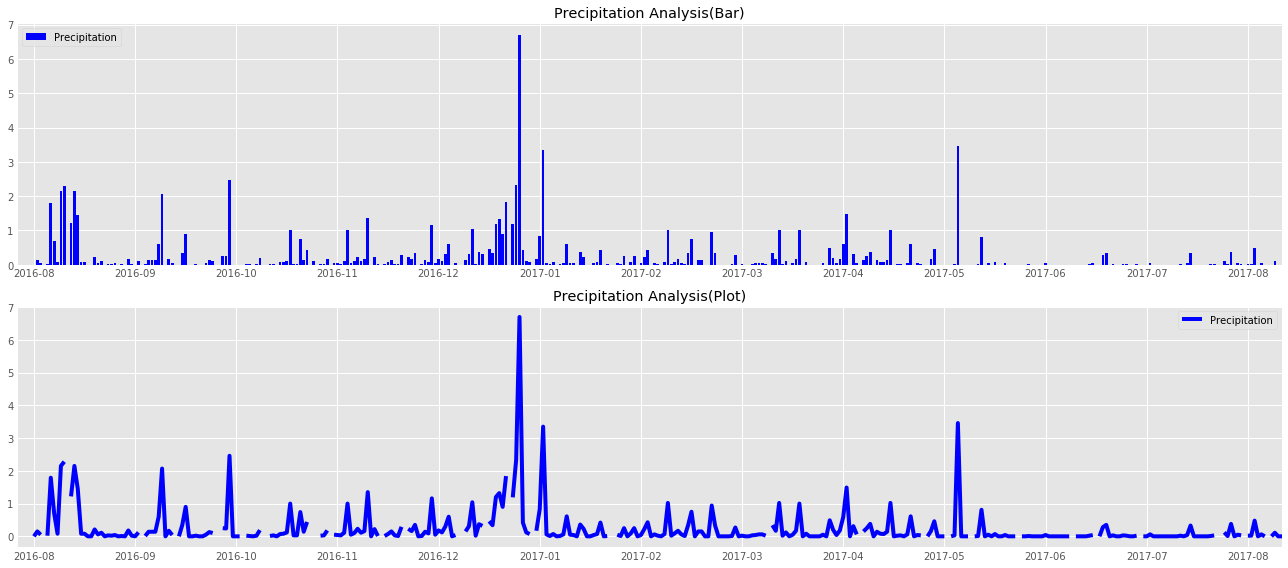

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


precipitation = session.query(Measurement.date,Measurement.prcp).\
                    filter(func.strftime("%Y-%m-%d", Measurement.date) >= '2016-08-23').\
                    order_by(Measurement.date).all()
prcp_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
# Load data to a dataframe

# Sort dataframe by date

#precipitation_df = precipitation_df.dropna()

# For setting up the index
# precipitation_df.set_index('Date', inplace=True)

# Resize the plot

# Plot the precipitation


# Define the reference font size


# Add labels and Title

# Add Grids


# Add ticks

# Save Plot

#Show the Plot
plt.style.use('ggplot')
x_label = ['2016-08', '2016-09', '2016-10', '2016-11', '2016-12', 
          '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', 
          '2017-06', '2017-07', '2017-08', ]
x_value= np.arange(len(prcp_df['date']))
fig, ax = plt.subplots(nrows=2,figsize=(18, 8))
major_ticks = np.arange(0, 390, 30)
ax[0].bar(x_value, prcp_df['precipitation'], color='blue')
ax[0].set_xticks(major_ticks)
ax[0].set_xticklabels(x_label)
ax[0].set_xlim(-5,370)
ax[0].legend(['Precipitation'], loc=0)
ax[0].set_title('Precipitation Analysis(Bar)')
ax[1].plot(x_value, prcp_df['precipitation'], color='blue')
ax[1].set_xticks(major_ticks)
ax[1].set_xticklabels(x_label)
ax[1].set_xlim(-5,370)
ax[1].legend(['Precipitation'], loc=0)
ax[1].set_title('Precipitation Analysis(Plot)')
plt.tight_layout()
plt.savefig("precipitation_analysis.png", bbox_inches='tight')
plt.show()


![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# precipitation_df.set_index('Date', inplace=True)
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Station.station, func.count(Station.id)).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Station.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station,  func.min(Measurement.tobs), 
              func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

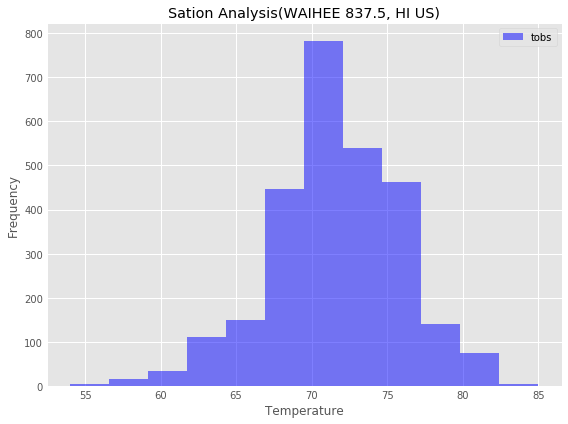

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature = session.query(Measurement.tobs).\
              filter(Station.station == Measurement.station).\
              filter(Station.name == 'WAIHEE 837.5, HI US').all()
        
tobs_df = pd.DataFrame(temperature, columns=['tobs'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(tobs_df['tobs'], bins=12, color='blue', alpha=0.5)
ax.legend(['tobs'])
ax.set_title('Sation Analysis(WAIHEE 837.5, HI US)')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig("station_analysis.png", bbox_inches='tight')
plt.show()

![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
initial_vacation_date = "2016-12-01"
final_vacation_date = "2016-12-16"

# Previous Year Dates
initial_prevyear_date = "2015-12-01"
final_prevyear_date = "2015-12-16"

# Max, min and average calculation
min_vacation_temp = calc_temps(initial_prevyear_date, final_prevyear_date)[0][0]
avg_vacation_temp = calc_temps(initial_prevyear_date, final_prevyear_date)[0][1]
max_vacation_temp = calc_temps(initial_prevyear_date, final_prevyear_date)[0][2]

print(min_vacation_temp, avg_vacation_temp, max_vacation_temp)

65.0 73.41836734693878 82.0


In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

start_date = dt.datetime(2017, 7, 17)
end_date = dt.datetime(2017, 7, 27)
temp_data = calc_temps(start_date, end_date)
Max = temp_data[0]
Min = temp_data[1]
Avg = temp_data[2]

fig, ax = plt.subplots(figsize=(2,6))
ax.bar(x=1, height= Avg, width=2, left=2, yerr=Max-Min, color='salmon', alpha=0.6)
ax.set_xlim(0,4)
ax.set_xticklabels('')
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp(F)')
plt.tight_layout()
plt.savefig("temperture_analysis.png", bbox_inches='tight')
plt.show()

IndexError: list index out of range

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station,  Station.name, Station.latitude, Station.longitude, Station.elevation).\
   filter(Station.station == Measurement.station).\
       filter(Measurement.date >= initial_prevyear_date).filter(Measurement.date <= final_prevyear_date).\
           group_by(Measurement.station).\
               order_by(Measurement.prcp.desc()).all()


[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
